# WITH EPOCHS=20

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [11]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 249us/step - loss: 0.5274 - accuracy: 0.7957 - val_loss: 0.4022 - val_accuracy: 0.8590
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3190 - accuracy: 0.8987 - val_loss: 0.3146 - val_accuracy: 0.8815
Epoch 3/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2338 - accuracy: 0.9251 - val_loss: 0.2988 - val_accuracy: 0.8800
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1842 - accuracy: 0.9414 - val_loss: 0.2741 - val_accuracy: 0.8916
Epoch 5/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1514 - accuracy: 0.9506 - val_loss: 0.2793 - val_accuracy: 0.8876
Epoch 6/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1245 - accuracy: 0.9624 - val_loss: 0.2883 - val_accuracy: 0.8863
Epoch 7/20
15000/15000 [==============================] - 2s 

In [16]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


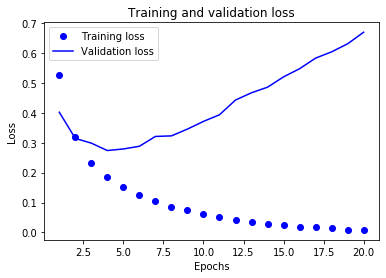

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

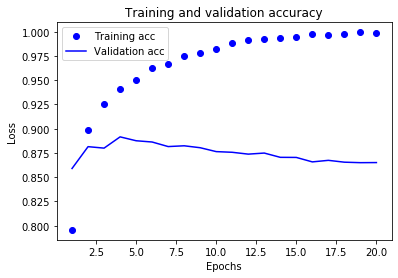

In [20]:
# plt.clf() # clears the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

# WITH EPOCHS=4

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.4735 - accuracy: 0.8314
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2719 - accuracy: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2052 - accuracy: 0.9282
Epoch 4/4
25000/25000 [==============================] - 3s 106us/step


In [22]:
print("Results:", results)

Results: [0.2983546015739441, 0.8818399906158447]


In [23]:
model.predict(x_test)

array([[0.17030263],
       [0.9989691 ],
       [0.6397191 ],
       ...,
       [0.08674306],
       [0.05432734],
       [0.6713792 ]], dtype=float32)